In [1]:
import json

In [2]:
import os 
result_dir = 'logs/eval'
result_files = os.listdir(result_dir)
res = []
for file in result_files:
    if not file.endswith('.json'): continue
    with open(os.path.join(result_dir, file), 'r') as f:
        results = json.load(f)
    if any('categories' in v for round in results for k, v in round.items()):
        res.append((file, results))


In [5]:
def get_success_rate(data):
    flat = [value for round in data for value in round.values()]

In [6]:
r = json.load(open(result_dir + '/' + result_files[1]))

In [7]:
list(repo for round in r for repo in round)

['fastapi',
 'black',
 'rich',
 'open-interpreter',
 'spaCy',
 'you-get',
 'textual',
 'beets',
 'starlette',
 'datasets',
 'mypy',
 'sympy',
 'ydata-profiling',
 'spotify-downloader',
 'qlib',
 'scapy',
 'camel',
 'boto3',
 'cloud-custodian',
 'aim',
 'speechbrain',
 'nonebot2',
 'moto',
 'numba',
 'pymc',
 'django-stubs',
 'pennylane',
 'X-AnyLabeling',
 'opencompass',
 'R2R',
 'Torch-Pruning',
 'scvi-tools',
 'sabnzbd',
 'dlt',
 'fastapi',
 'black',
 'rich',
 'open-interpreter',
 'spaCy',
 'you-get',
 'textual',
 'beets',
 'starlette',
 'datasets',
 'mypy',
 'sympy',
 'ydata-profiling',
 'spotify-downloader',
 'qlib',
 'scapy',
 'camel',
 'boto3',
 'cloud-custodian',
 'aim',
 'speechbrain',
 'nonebot2',
 'moto',
 'numba',
 'pymc',
 'django-stubs',
 'pennylane',
 'X-AnyLabeling',
 'opencompass',
 'R2R',
 'Torch-Pruning',
 'scvi-tools',
 'sabnzbd',
 'dlt',
 'fastapi',
 'black',
 'rich',
 'open-interpreter',
 'spaCy',
 'you-get',
 'textual',
 'beets',
 'starlette',
 'datasets',
 'mypy'

In [3]:
repo_sets = [
    "eval/resources/python_repos_5k-1k.json",
    "eval/resources/python_repos_10k-5k.json",
    "eval/resources/python_repos_20k-10k.json",
    "eval/resources/python_repos_20k+.json"
]
repos = [json.load(open(repo_set, 'r')) for repo_set in repo_sets]
repos = [repo for repo_set in repos for repo in repo_set]

In [13]:
for repo_set in repo_sets:
    set_repos = json.load(open(repo_set, 'r'))
    print("\\hline")
    print(f"\\multirow{{20}}{{=}}{{{repo_set.split('_')[-1][:-5]}}}")
    for repo in set_repos:
        url = repo['url'][:-4]
        name = url.split('/')[-1]
        print(f"  &  {name} & {url} \\\\")
        print("\\cline{2-3}")

\hline
\multirow{20}{=}{5k-1k}
  &  icloud-drive-docker & https://github.com/mandarons/icloud-drive-docker \\
\cline{2-3}
  &  django-stubs & https://github.com/typeddjango/django-stubs \\
\cline{2-3}
  &  pennylane & https://github.com/PennyLaneAI/pennylane \\
\cline{2-3}
  &  X-AnyLabeling & https://github.com/CVHub520/X-AnyLabeling \\
\cline{2-3}
  &  opencompass & https://github.com/open-compass/opencompass \\
\cline{2-3}
  &  R2R & https://github.com/SciPhi-AI/R2R \\
\cline{2-3}
  &  Torch-Pruning & https://github.com/VainF/Torch-Pruning \\
\cline{2-3}
  &  scvi-tools & https://github.com/scverse/scvi-tools \\
\cline{2-3}
  &  sabnzbd & https://github.com/sabnzbd/sabnzbd \\
\cline{2-3}
  &  dlt & https://github.com/dlt-hub/dlt \\
\cline{2-3}
\hline
\multirow{20}{=}{10k-5k}
  &  camel & https://github.com/camel-ai/camel \\
\cline{2-3}
  &  boto3 & https://github.com/boto/boto3 \\
\cline{2-3}
  &  cloud-custodian & https://github.com/cloud-custodian/cloud-custodian \\
\cline{2-3}
  

In [9]:
repos_w_docs = list(filter(lambda x: len(x['relevant_docs']) > 0, repos))

In [10]:
repos_w_docs

[{'url': 'https://github.com/typeddjango/django-stubs.git',
  'categories': [1],
  'test_type': 'pytest',
  'relevant_docs': ['CONTRIBUTING.md'],
  'tags': ['requirements', 'pytest'],
  'working': True,
  'ref': 'b325955',
  'info': 0.3333333333333333,
  'visibility': 1.0},
 {'url': 'https://github.com/PennyLaneAI/pennylane.git',
  'categories': [3],
  'test_type': 'pytest',
  'relevant_docs': ['.github/CONTRIBUTING.md',
   'doc/development/guide/installation.rst',
   'doc/development/guide/tests.rst'],
  'tags': ['install-self', 'requirements-extra', 'pytest', 'pytest-extra'],
  'ref': 'b78565c',
  'info': 0.4,
  'visibility': 0.14285714285714285},
 {'url': 'https://github.com/CVHub520/X-AnyLabeling.git',
  'categories': [1],
  'test_type': 'unittest',
  'relevant_docs': ['docs/en/get_started.md'],
  'tags': ['pip-extra', 'requirements', 'unittest'],
  'ref': '7c62ffb',
  'info': 0.4,
  'visibility': 0.3333333333333333},
 {'url': 'https://github.com/open-compass/opencompass.git',
  'c

In [11]:
from collections import Counter
doc_files = [repo['relevant_docs'] for repo in repos]
doc_files_clean = Counter([doc.split('/')[-1].split('.')[0].lower().replace('-', '_') for docs in doc_files for doc in docs])
doc_files = Counter([doc for docs in doc_files for doc in docs])


In [12]:
print(f"total number of repos: {len(repos)}")
print(f"number of unique paths to relevant documentation: {len(doc_files)}")
print(f"number of unique names of relevant documentation: {len(doc_files_clean)}")
print(f"number of repos with no relevant documentation: {len([r for r in repos if len(r['relevant_docs']) == 0])}")

total number of repos: 40
number of unique paths to relevant documentation: 29
number of unique names of relevant documentation: 18
number of repos with no relevant documentation: 6


In [13]:
from typing import List, Union
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, NullLocator
import scienceplots
plt.style.use(['science'])

def bar(
    values: List[Union[float, int]],
    categories: List[str],
    x_label: str = "x",
    y_label: str = "y",
    title: str = "title",
):
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[1] if x[0] != 'other' else -1))
    
    # remove minor ticks
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(NullLocator())
    ax.yaxis.set_minor_locator(NullLocator())
    
    plt.bar(categories, values)
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Force y-axis to use whole numbers
    plt.savefig(f"figs/{title.replace(' ', '_')}.pdf", format="pdf")
    plt.show()

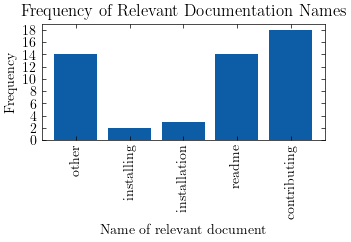

In [14]:
vals = {key: val for key, val in doc_files_clean.items() if val > 1}
vals['other'] = sum([v for v in doc_files_clean.values() if v <= 1])
bar(vals.values(), vals.keys(), x_label="Name of relevant document", y_label="Frequency", title="Frequency of Relevant Documentation Names")

In [ ]:
import os
dockerfiles_dir = 'resources/working_dockerfiles'
subdirs = os.listdir(dockerfiles_dir)
dockerfile_paths = []
dockerfiles = []
dockerfile_tags = [frozenset(repo['tags']) for repo in repos if 'tags' in repo]
df_filter = lambda x: (
    x != '' and not (x.startswith('#')
    or x.startswith('FROM') or x.startswith('WORKDIR') or x.startswith('COPY') )
)
for subdir in subdirs:
    for dockerfile in os.listdir(os.path.join(dockerfiles_dir, subdir)):
        df = os.path.join(dockerfiles_dir, subdir, dockerfile)
        if os.path.isfile(df):
            dockerfile_paths.append(df)
            dockerfiles.append(list(filter(df_filter, map(lambda x: x.strip(), open(df, 'r').readlines()))))
print(len(dockerfile_paths))

In [12]:
flat_tags = set([tag for tag_set in dockerfile_tags for tag in tag_set])

In [13]:
print(len(dockerfile_tags))
print(len(set(dockerfile_tags)))
print(len(flat_tags))

40
31
18


In [14]:
from pprint import pprint
pprint(flat_tags)

{'bash-extra',
 'extra',
 'install-other',
 'install-pytest',
 'install-self',
 'install-tox',
 'make-install',
 'make-test',
 'pip-extra',
 'poetry',
 'poetry-extra',
 'pytest',
 'pytest-extra',
 'requirements',
 'requirements-extra',
 'test-other',
 'tox',
 'unittest'}


In [15]:
df_set = set('\n'.join(dockerfile) for dockerfile in dockerfiles)

In [16]:
print(len(dockerfiles))
print(len(df_set))

40
37


In [17]:
pprint(dockerfile_paths)

['resources/working_dockerfiles/20k+/core.dockerfile',
 'resources/working_dockerfiles/20k+/you-get.dockerfile',
 'resources/working_dockerfiles/20k+/spacy.dockerfile',
 'resources/working_dockerfiles/20k+/black.dockerfile',
 'resources/working_dockerfiles/20k+/tqdm.dockerfile',
 'resources/working_dockerfiles/20k+/textual.dockerfile',
 'resources/working_dockerfiles/20k+/open-interpreter.dockerfile',
 'resources/working_dockerfiles/20k+/sherlock.dockerfile',
 'resources/working_dockerfiles/20k+/fastapi.dockerfile',
 'resources/working_dockerfiles/20k+/rich.dockerfile',
 'resources/working_dockerfiles/20k-10k/mypy.dockerfile',
 'resources/working_dockerfiles/20k-10k/yfinance.dockerfile',
 'resources/working_dockerfiles/20k-10k/datasets.dockerfile',
 'resources/working_dockerfiles/20k-10k/ydata-profiling.dockerfile',
 'resources/working_dockerfiles/20k-10k/starlette.dockerfile',
 'resources/working_dockerfiles/20k-10k/qlib.dockerfile',
 'resources/working_dockerfiles/20k-10k/sympy.docke